In [62]:
#importnado bibliotecas que foram usadas (algumas não foram no final)
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score

import scipy.stats as stats

In [63]:
#adicionando a base de dados utilizados no programa para fazer a regressão
dados_df = pd.read_excel("database2019.xlsx")
df = pd.read_excel("database2019.xlsx")
dados_df = dados_df.drop(['Municipios'],axis=1) #deletando a coluna com os municipios para ter apenas dados numéricos

In [64]:
#Rodando as estatisticas descritivas de todos os dados
dados_df.describe()

,tCO2epc,PIBpc,PIBpc2,PIBpc3,Agro,Ind,Serv,Dist,Sudeste,Norte,Sul,Centro-Oeste
count,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000
mean,2.117187,1.945804,4.650981,12.563875,-1.877931,-2.076246,-0.792937,5.270844,0.298559,0.080901,0.213874,0.083964
std,1.160941,0.930044,3.926675,15.519746,1.419621,0.698340,0.377136,0.833671,0.457667,0.272707,0.410076,0.277359
min,-0.622077,-0.209133,0.000106,-0.009147,-13.830953,-4.282309,-3.839545,1.287067,0.000000,0.000000,0.000000,0.000000
25%,1.254241,1.157033,1.338727,1.548956,-2.277684,-2.585851,-0.988341,4.805431,0.000000,0.000000,0.000000,0.000000
50%,2.032260,1.986027,3.944302,7.833488,-1.516225,-2.200961,-0.713669,5.429381,0.000000,0.000000,0.000000,0.000000
75%,2.836413,2.623780,6.884222,18.062684,-0.947634,-1.584684,-0.511837,5.882330,1.000000,0.000000,0.000000,0.000000
max,7.512827,5.550729,30.810593,171.021250,-0.115604,-0.054724,-0.106878,7.297279,1.000000,1.000000,1.000000,1.000000


In [65]:
#Analise de Correlção
dados_df.corr()

,tCO2epc,PIBpc,PIBpc2,PIBpc3,Agro,Ind,Serv,Dist,Sudeste,Norte,Sul,Centro-Oeste
tCO2epc,1.000000,0.288015,0.249049,0.203039,0.466074,-0.186266,-0.485241,0.361323,-0.080352,0.325974,0.140661,0.393075
PIBpc,0.288015,1.000000,0.962384,0.873147,-0.267386,0.353244,-0.438129,-0.042123,0.158928,-0.118930,0.435312,0.183357
PIBpc2,0.249049,0.962384,1.000000,0.969955,-0.306595,0.374655,-0.446570,-0.045201,0.118493,-0.119574,0.397844,0.164534
PIBpc3,0.203039,0.873147,0.969955,1.000000,-0.324733,0.367808,-0.428910,-0.048653,0.091673,-0.106249,0.322373,0.137774
Agro,0.466074,-0.267386,-0.306595,-0.324733,1.000000,-0.506906,-0.313261,0.418222,-0.255567,0.135997,0.099027,0.110729
Ind,-0.186266,0.353244,0.374655,0.367808,-0.506906,1.000000,-0.162815,-0.193693,0.119502,-0.109952,0.049586,-0.008122
Serv,-0.485241,-0.438129,-0.446570,-0.428910,-0.313261,-0.162815,1.000000,-0.069276,0.224492,-0.186913,-0.227325,-0.186181
Dist,0.361323,-0.042123,-0.045201,-0.048653,0.418222,-0.193693,-0.069276,1.000000,0.046355,0.044974,0.044162,-0.001006
Sudeste,-0.080352,0.158928,0.118493,0.091673,-0.255567,0.119502,0.224492,0.046355,1.000000,-0.193560,-0.340292,-0.197519
Norte,0.325974,-0.118930,-0.119574,-0.106249,0.135997,-0.109952,-0.186913,0.044974,-0.193560,1.000000,-0.154749,-0.089823


In [66]:
#definindo y para simplificar a escrita e uma matriz X com a constante para regressão
Y = 'tCO2epc'
dados_df_X = dados_df.drop(Y,axis=1)  
dados_df_X = sm.add_constant(dados_df_X)
#display(dados_df_X)

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [67]:
#definir as matrizes ao quadrado.  Cada matriz é um modelo quadrático que adiciona ou retira variáveis para analisar
#os diferentes resultados quando feita a regressão

matrix0 = dados_df_X.drop(['PIBpc3','Agro','Ind','Serv','Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix1 = dados_df_X.drop(['PIBpc3','Agro','Ind','Serv'],axis=1)
matrix2 = dados_df_X.drop(['PIBpc3','Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix3 = dados_df_X.drop(['PIBpc3'],axis=1)


In [69]:
#Modelo quadrático
modelo0 = sm.OLS(dados_df[Y],matrix0)
res0 = modelo0.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res0.summary())
display(res0.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     285.0
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          1.47e-118
Time:                        13:17:50   Log-Likelihood:                -8429.9
No. Observations:                5550   AIC:                         1.687e+04
Df Residuals:                    5547   BIC:                         1.689e+04
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0508      0.054     19.332      0.0

16885.668038232307

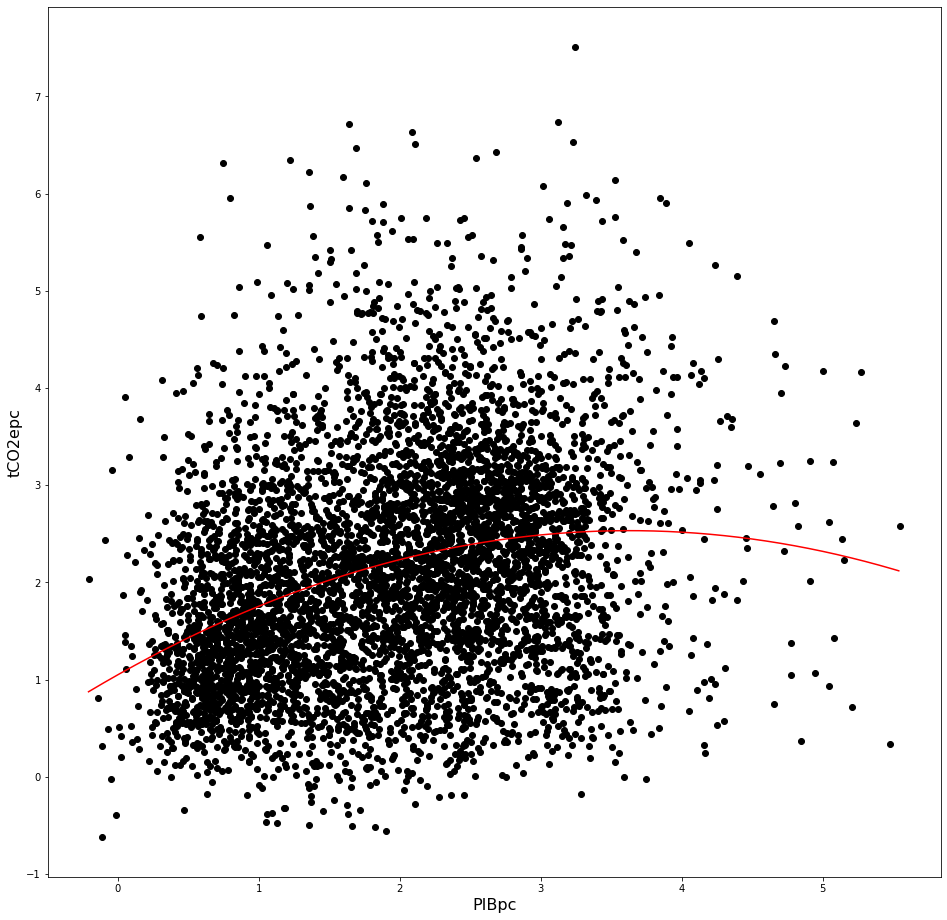

In [70]:
#Plotando um gráfico do modelo Quadrático 
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01) #criando um vetor para os valores de X
ymod0 =  1.0508 + 0.8173*g  -0.1127*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc',  fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc', fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod0 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [72]:
#Modelo quadratico com impacto regional
modelo = sm.OLS(dados_df[Y],matrix1)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     616.7
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:20:37   Log-Likelihood:                -6696.7
No. Observations:                5550   AIC:                         1.341e+04
Df Residuals:                    5542   BIC:                         1.346e+04
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.3012      0.097    -13.366   

13462.310964579307

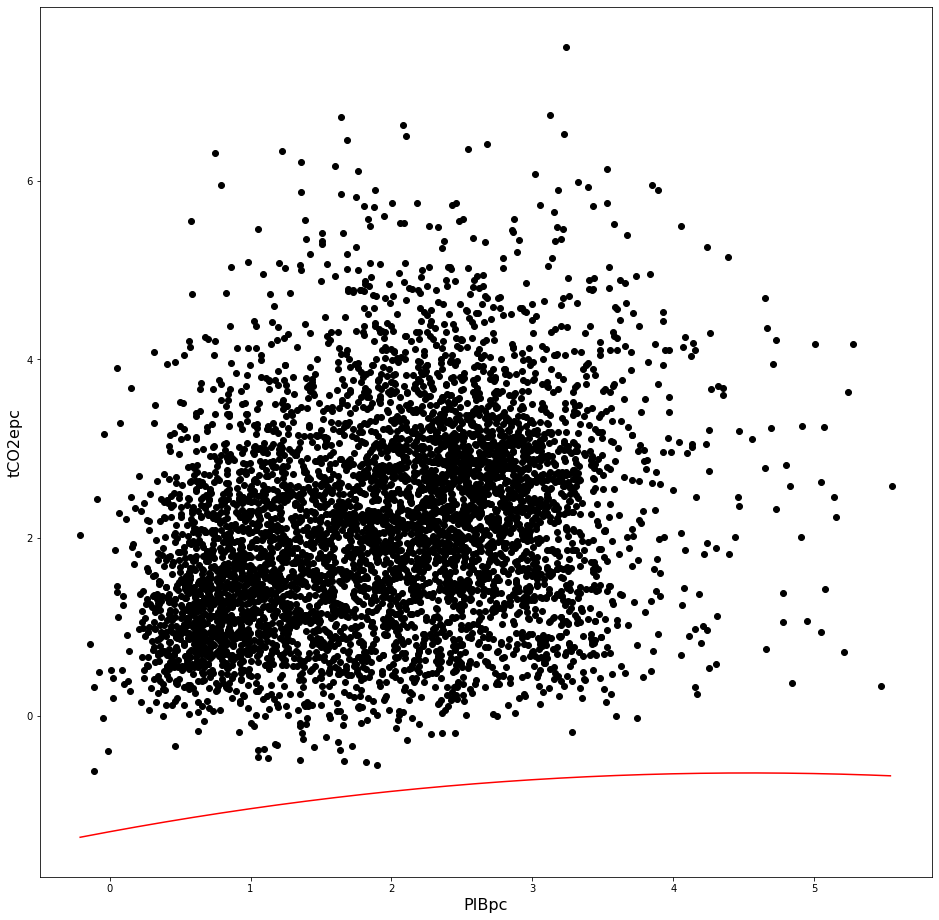

In [73]:
#Plotando um gráfico do modelo Quadrático com impacto regional
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01) #criando um vetor para os valores de X
ymod1 = -1.3012 + 0.2906*g  -0.0320*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc',  fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc',  fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod1 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [74]:
# Modelo quadratico com participação do VA dos 3 setores no PIB
modelo = sm.OLS(dados_df[Y],matrix2)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     697.2
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:20:39   Log-Likelihood:                -7137.1
No. Observations:                5550   AIC:                         1.429e+04
Df Residuals:                    5544   BIC:                         1.433e+04
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7887      0.112      7.052      0.0

14325.943820730687

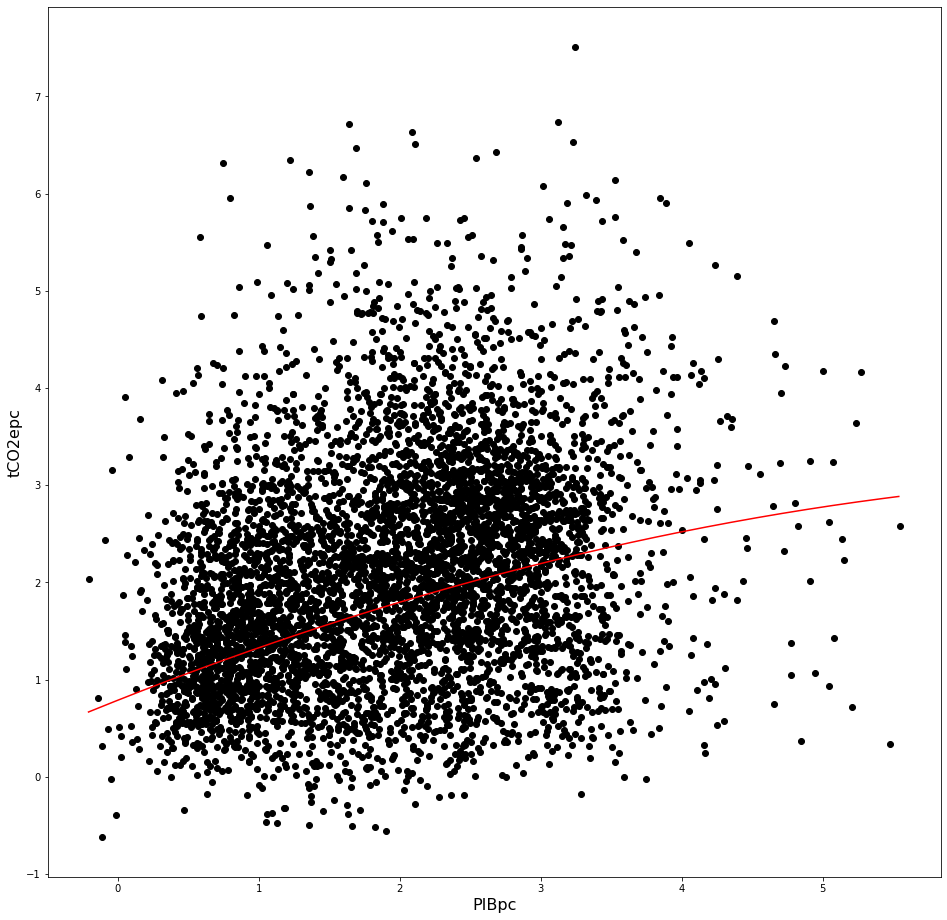

In [44]:
#Plotando um gráfico do Modelo quadratico com participação do VA dos 3 setores no PIB
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(),df.PIBpc.max(), 0.01) #criando um vetor para os valores de X
ymod2 = 0.7887 + 0.5749*g -0.0355*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc',  fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc',  fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod2 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [76]:
#Modelo quadratico com impacto regional e VA dos setores do PIB
modelo = sm.OLS(dados_df[Y],matrix3)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     751.9
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:26:17   Log-Likelihood:                -5878.4
No. Observations:                5550   AIC:                         1.178e+04
Df Residuals:                    5539   BIC:                         1.185e+04
Df Model:                          10                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6056      0.135     -4.502   

11851.667803159384

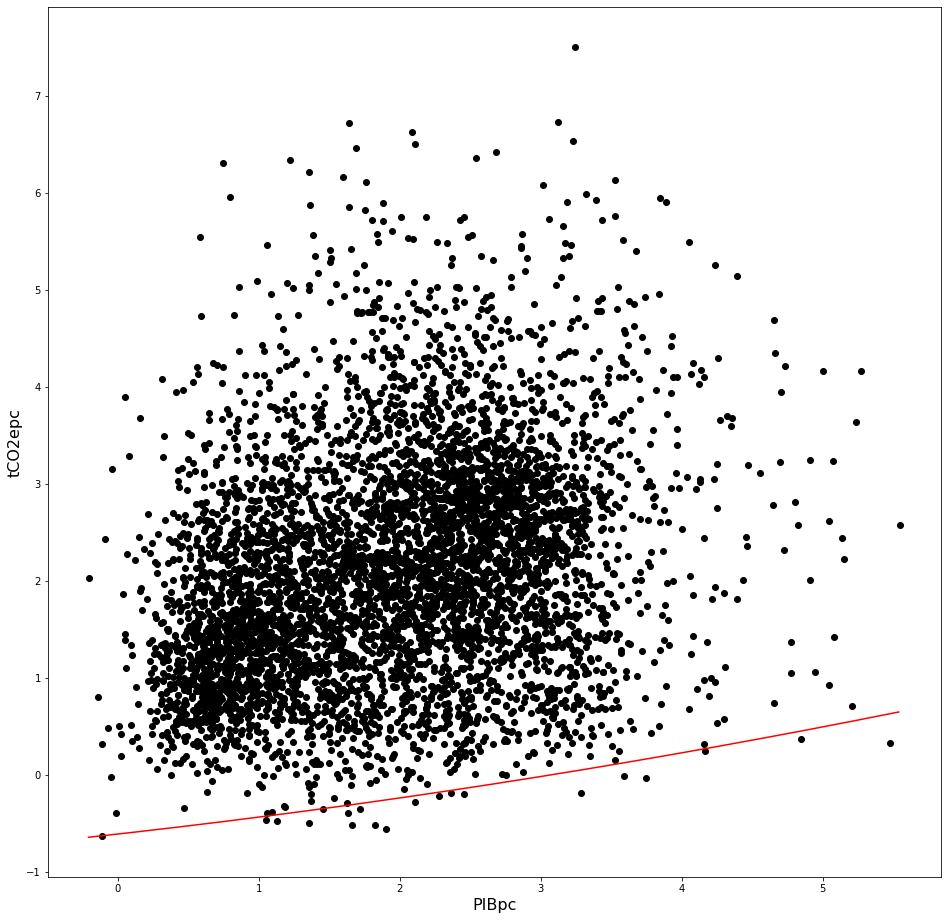

In [77]:
#Plotando um gráfico do modelo Quadrático com impacto regional e VA dos setores do PIB
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01) #criando um vetor para os valores de X
ymod3 = -0.6056 + 0.1628*g + 0.0116*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc', fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc',  fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod3 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [78]:
display(dados_df_X)

,const,PIBpc,PIBpc2,PIBpc3,Agro,Ind,Serv,Dist,Sudeste,Norte,Sul,Centro-Oeste
0,1.0,1.746035,3.048638,5.323030,-0.859248,-2.702702,-0.932731,4.634002,0,1,0,0
1,1.0,1.088165,1.184103,1.288500,-0.827665,-2.785019,-0.823141,5.394001,0,1,0,0
2,1.0,1.809422,3.274007,5.924058,-1.507787,-2.265621,-0.784214,5.039027,0,1,0,0
3,1.0,1.602229,2.567138,4.113142,-0.403515,-3.083651,-1.370072,3.104885,0,1,0,0
4,1.0,1.277663,1.632424,2.085688,-0.460883,-3.223650,-1.294993,4.216139,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5545,1.0,1.516633,2.300175,3.488520,-2.893292,-1.787719,-0.488072,6.091087,0,1,0,0
5546,1.0,2.428918,5.899644,14.329755,-0.312326,-3.136203,-1.652706,4.930532,0,1,0,0
5547,1.0,0.843671,0.711781,0.600509,-0.892087,-2.290045,-0.892544,5.313040,0,1,0,0
5548,1.0,1.117905,1.249712,1.397059,-1.606282,-1.631100,-0.802644,5.925798,0,1,0,0


In [79]:
#definir as matrizes cubicas pela letra B. Cada matriz é um modelo cubico que adiciona ou retira variáveis para analisar
#os diferentes resultados quando feita a regressão
matrix4 = dados_df_X.drop(['Agro','Ind','Serv','Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix5 = dados_df_X.drop(['Agro','Ind','Serv'],axis=1)
matrix6 = dados_df_X.drop(['Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix7 = dados_df_X


In [81]:
#Modelo cubico apenas os PIBpc
modelo = sm.OLS(dados_df[Y],matrix4)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     192.4
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          1.12e-118
Time:                        13:27:34   Log-Likelihood:                -8429.6
No. Observations:                5550   AIC:                         1.687e+04
Df Residuals:                    5546   BIC:                         1.689e+04
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0008      0.083     12.083      0.0

16893.706069775035

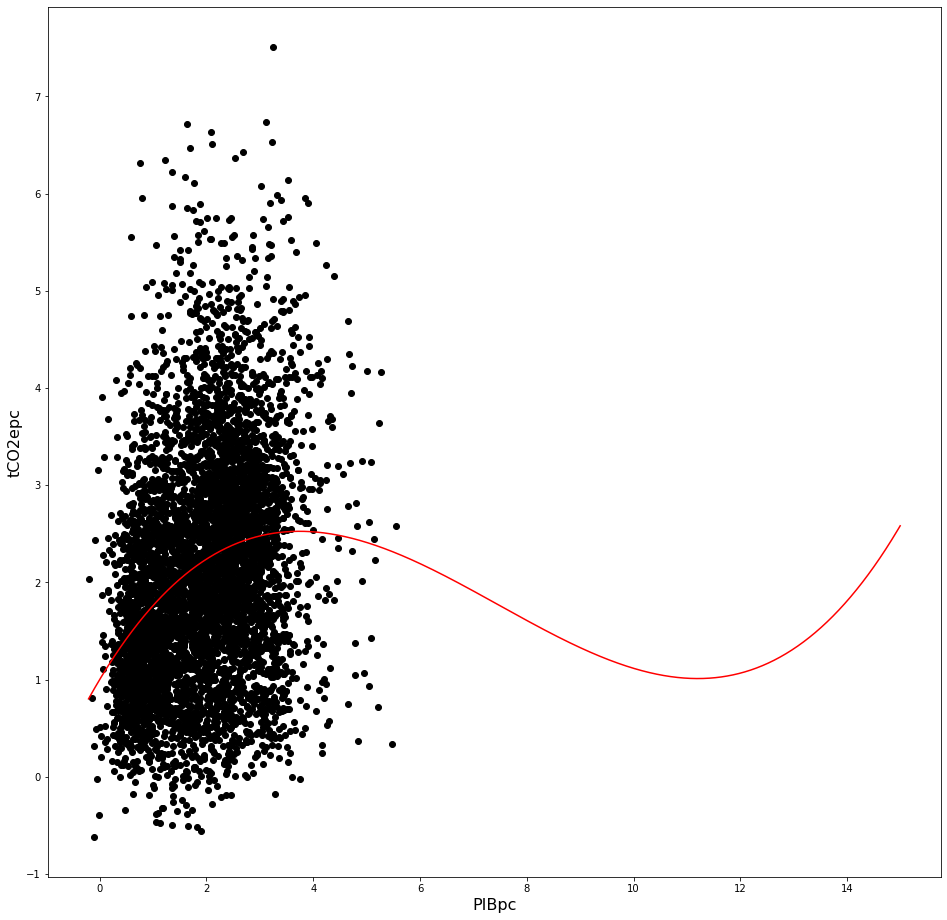

In [82]:
#Gráfico do Modelo cubico
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), 15, 0.01)
ymod4 = 1.0008 + 0.9175*g -0.1636*(g*g) +  0.0073*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod4 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')


In [84]:
#Modelo cubico com impacto regional
modelo = sm.OLS(dados_df[Y],matrix5)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     535.6
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:29:01   Log-Likelihood:                -6689.7
No. Observations:                5550   AIC:                         1.340e+04
Df Residuals:                    5541   BIC:                         1.346e+04
Df Model:                           8                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.4839      0.112    -13.199   

13456.902685110992

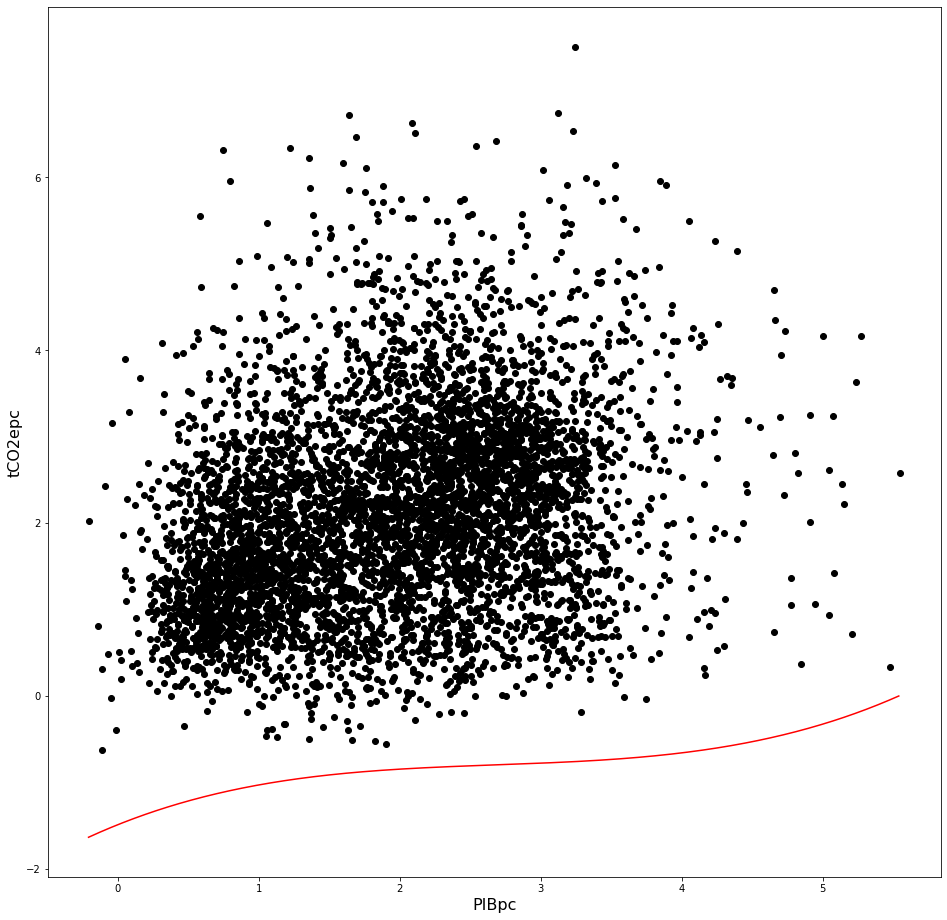

In [85]:
#Gráfico do Modelo cubico com impacto regional
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
ymod5 = -1.4839 + 0.6518*g -0.2199*(g*g) + 0.0272*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod5 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [87]:
# Modelo cubico com participação do VA dos 3 setores no PIB 
modelo = sm.OLS(dados_df[Y],matrix6)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     579.0
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:31:05   Log-Likelihood:                -7134.8
No. Observations:                5550   AIC:                         1.428e+04
Df Residuals:                    5543   BIC:                         1.433e+04
Df Model:                           6                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6938      0.123      5.623      0.0

14330.023161898696

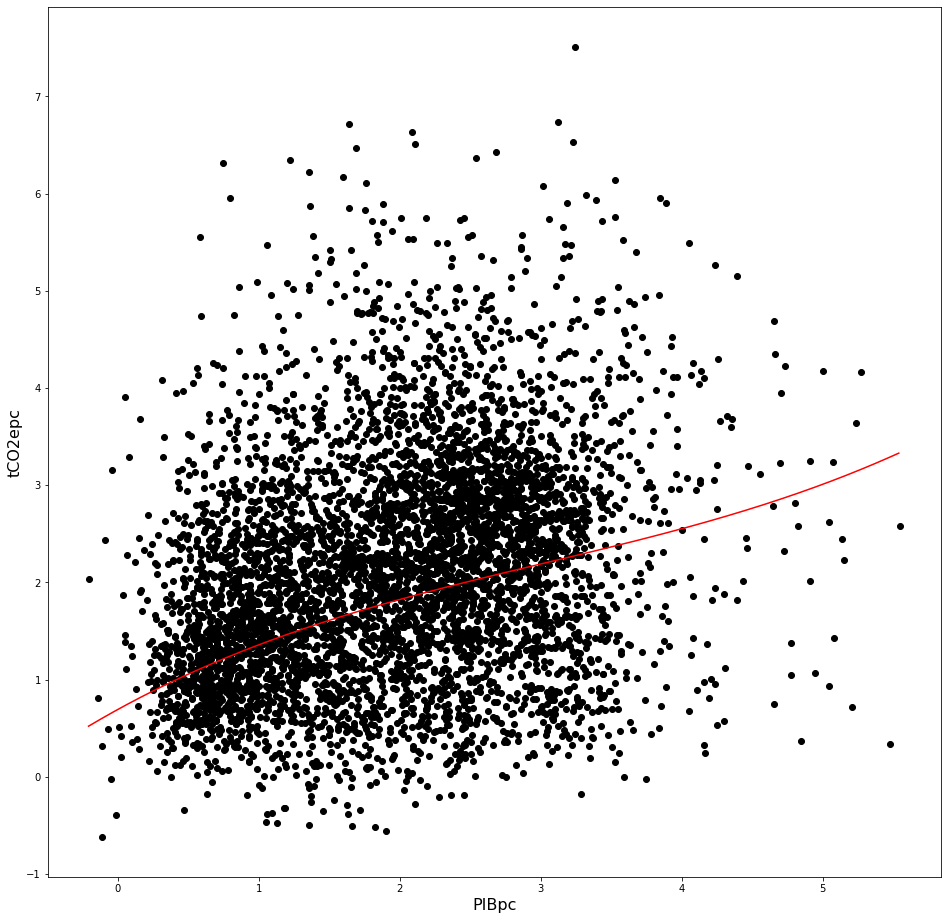

In [88]:
#Gráfico do Modelo cubico com participação do VA dos 3 setores no PIB 
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
ymod6 = 0.6938 + 0.7965*g -0.1482*(g*g) + 0.0163*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod6 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [90]:
# Modelo cubico com impacto regional e VA dos setores do PIB
modelo = sm.OLS(dados_df[Y],matrix7)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     681.8
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:33:15   Log-Likelihood:                -5876.9
No. Observations:                5550   AIC:                         1.178e+04
Df Residuals:                    5538   BIC:                         1.186e+04
Df Model:                          11                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6735      0.145     -4.658   

11857.182449576194

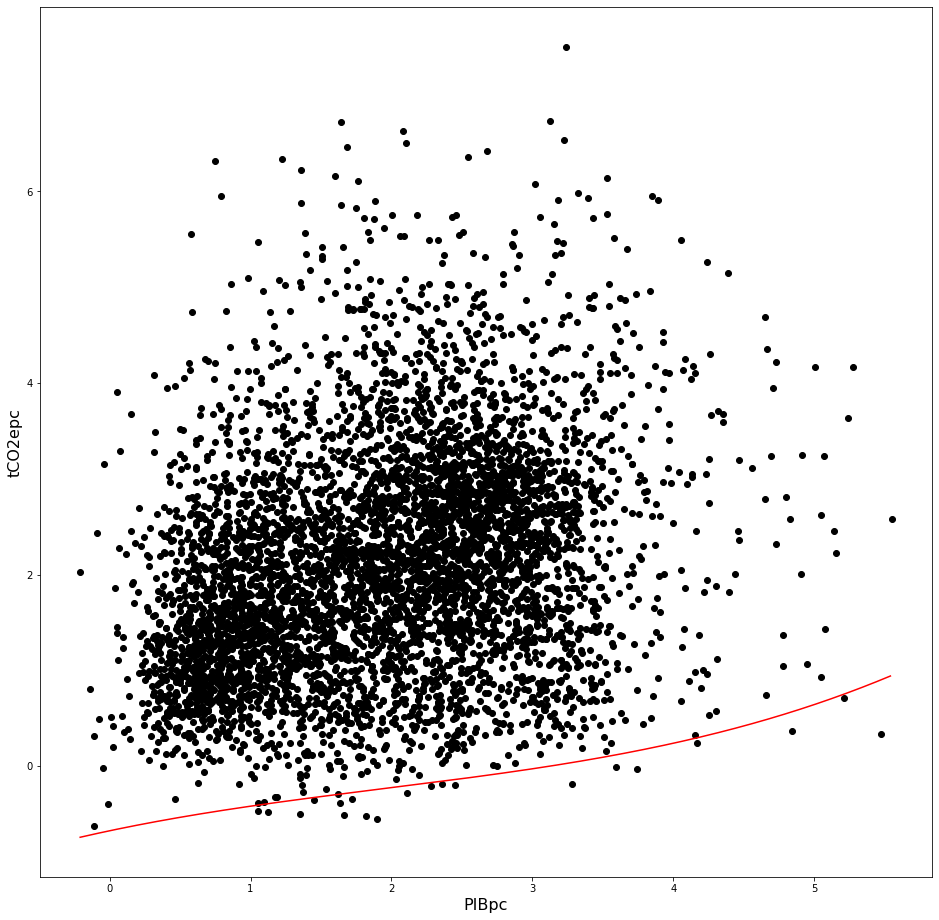

In [91]:
#Gráfico do Modelo cubico com impacto regional e VA dos setores do PIB
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
ymod7 = -0.6735 + 0.3104*g -0.0649*(g*g) + 0.0111*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod7 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

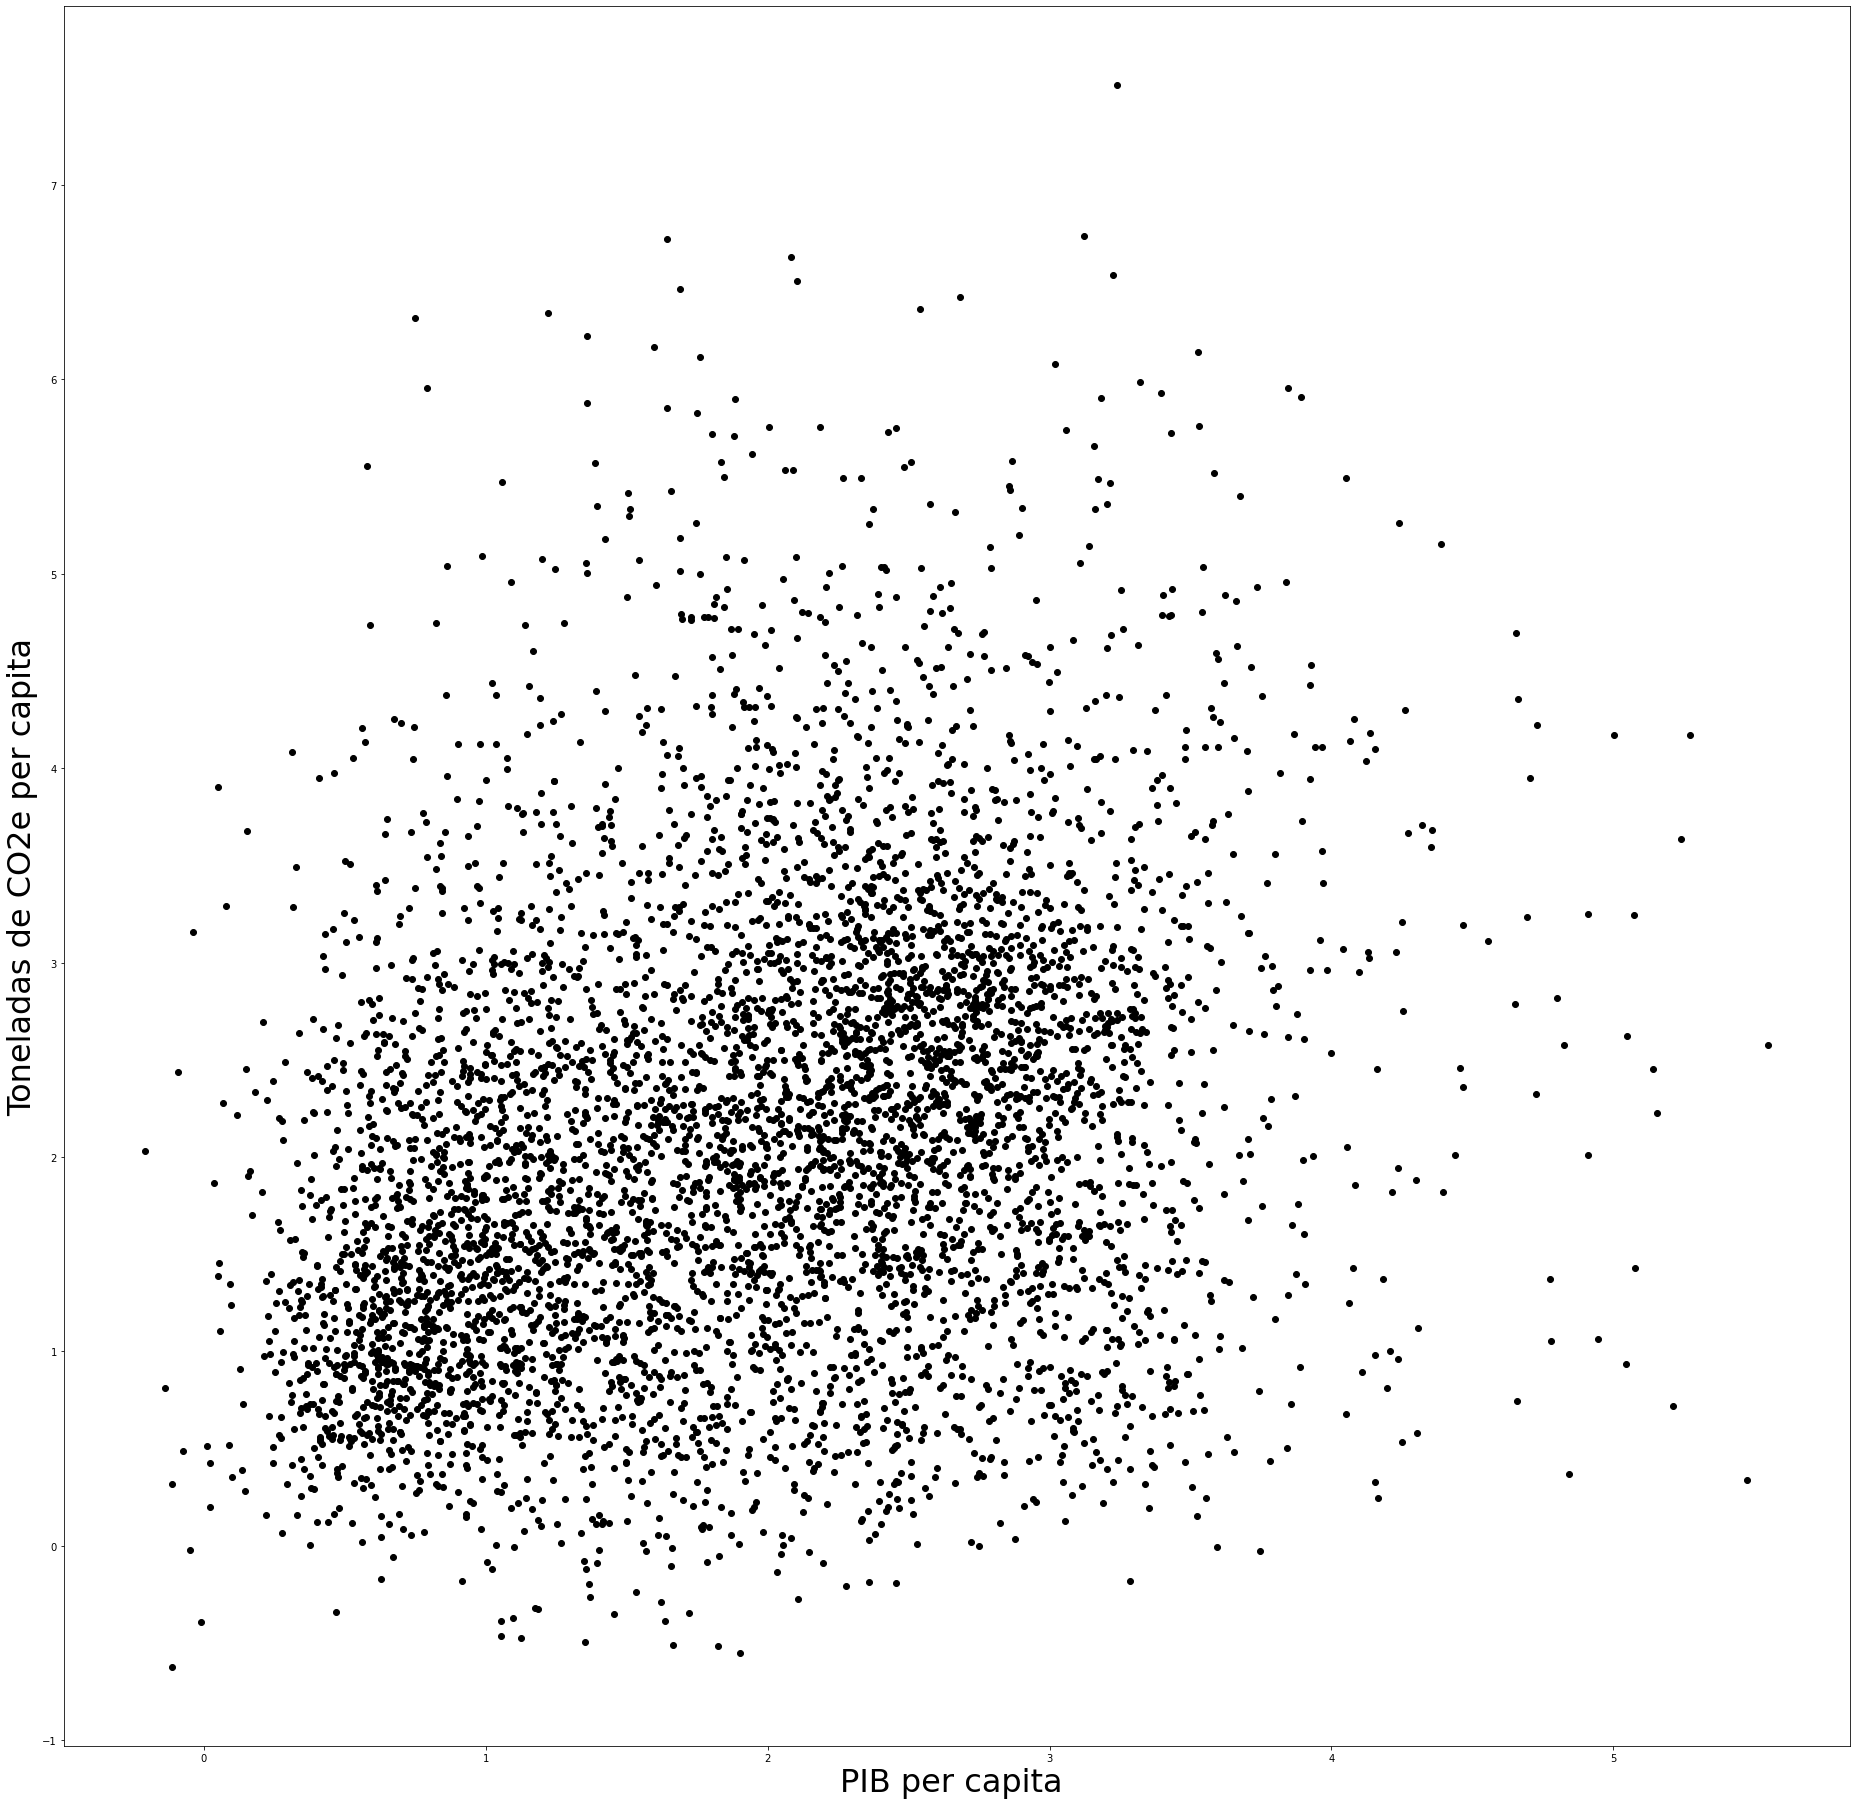

In [92]:
#plotando o gráfico de dispersão das variáveis
plt.figure(figsize = (32,32))
plt.scatter(dados_df['PIBpc'],dados_df['tCO2epc'],c='black')
plt.xlabel("PIB per capita ",fontsize = 32)
plt.ylabel("Toneladas de CO2e per capita", fontsize = 32)
plt.show()

In [93]:
#?sm.OLS
#?sm.QuantReg

modeloq =sm.QuantReg(dados_df[Y],matrix0)
resq = modeloq.fit(q=0.15)

modeloq1 =sm.QuantReg(dados_df[Y],matrix0)
resq1 = modeloq1.fit(q=0.30)

modeloq2 =sm.QuantReg(dados_df[Y],matrix0)
resq2 = modeloq2.fit(q=0.45)

modeloq3 =sm.QuantReg(dados_df[Y],matrix0)
resq3 = modeloq3.fit(q=0.60)

modeloq4 =sm.QuantReg(dados_df[Y],matrix0)
resq4 = modeloq4.fit(q=0.75)

modeloq5 =sm.QuantReg(dados_df[Y],matrix0)
resq5 = modeloq5.fit(q=0.90)

const = [resq.params["const"],resq1.params["const"],resq2.params["const"],resq3.params["const"],resq4.params["const"],resq5.params["const"]]
param1 = [resq.params["PIBpc"],resq1.params["PIBpc"],resq2.params["PIBpc"],resq3.params["PIBpc"],resq4.params["PIBpc"],resq5.params["PIBpc"]]
param2 = [resq.params["PIBpc2"],resq1.params["PIBpc2"],resq2.params["PIBpc2"],resq3.params["PIBpc2"],resq4.params["PIBpc2"],resq5.params["PIBpc2"]]

print(resq.summary())
#print(resq1.summary())
#print(resq2.summary())
#print(resq3.summary())
#print(resq4.summary())
#print(resq5.summary())

                         QuantReg Regression Results                          
Dep. Variable:                tCO2epc   Pseudo R-squared:              0.02583
Model:                       QuantReg   Bandwidth:                      0.2463
Method:                 Least Squares   Sparsity:                        3.899
Date:                Wed, 16 Nov 2022   No. Observations:                 5550
Time:                        13:33:19   Df Residuals:                     5547
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3226      0.070      4.603      0.000       0.185       0.460
PIBpc          0.5680      0.073      7.807      0.000       0.425       0.711
PIBpc2        -0.0944      0.017     -5.425      0.000      -0.129      -0.060


Text(0, 0.5, 'tCO2epc')

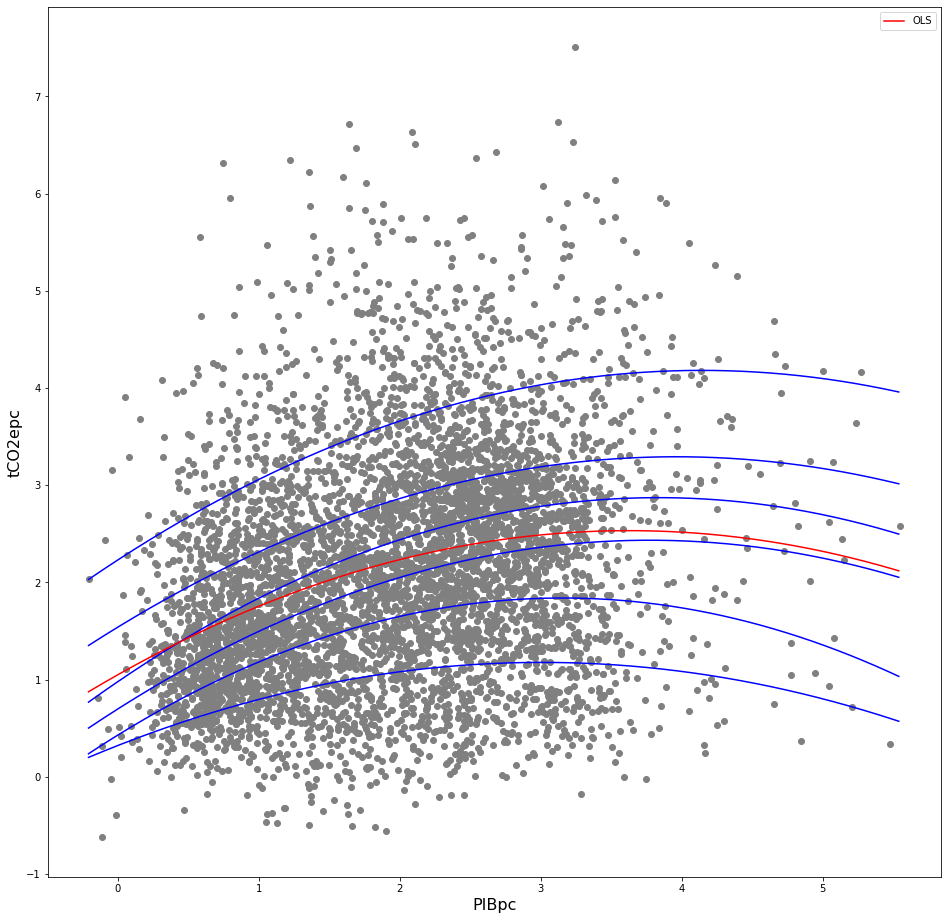

In [96]:
#Regressão Quantilica com o modelo quadrático
x = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
   
y0 = 0.3226 + 0.5680*(x) -0.0944*(x*x)
y1 = 0.4303 + 0.8934*(x) -0.1416*(x*x)
y2 = 0.6992 + 0.9197*(x) -0.1219*(x*x)
y3 = 0.9801 + 0.9869*(x) -0.1287*(x*x)
y4 = 1.5409 + 0.8843*(x) -0.1116*(x*x)
y5 = 2.2322 + 0.9411*(x) -0.1136*(x*x)
    

#display(y2)
fig, ax = plt.subplots(figsize=(16, 16))
#?ax.plot

ax.plot(x, y0, color="blue")
ax.plot(x, y1, color="blue")
ax.plot(x, y2, color="blue")
ax.plot(x, y3, color="blue")
ax.plot(x, y4, color="blue")
ax.plot(x, y5, color="blue")



ax.plot(x, ymod0, color="red", label="OLS")
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'grey')
legend = ax.legend()
ax.set_xlabel("PIBpc", fontsize=16)
ax.set_ylabel("tCO2epc", fontsize=16)

In [97]:
#?sm.OLS
#?sm.QuantReg

modeloq6 =sm.QuantReg(dados_df[Y],matrix4)
resq6 = modeloq6.fit(q=0.15)

modeloq7 =sm.QuantReg(dados_df[Y],matrix4)
resq7 = modeloq7.fit(q=0.30)

modeloq8 =sm.QuantReg(dados_df[Y],matrix4)
resq8 = modeloq8.fit(q=0.45)

modeloq9 =sm.QuantReg(dados_df[Y],matrix4)
resq9 = modeloq9.fit(q=0.60)

modeloq10 =sm.QuantReg(dados_df[Y],matrix4)
resq10 = modeloq10.fit(q=0.75)

modeloq11 =sm.QuantReg(dados_df[Y],matrix4)
resq11 = modeloq11.fit(q=0.90)

const = [resq6.params["const"],resq7.params["const"],resq8.params["const"],resq9.params["const"],resq10.params["const"],resq11.params["const"]]
param1 = [resq6.params["PIBpc"],resq7.params["PIBpc"],resq8.params["PIBpc"],resq9.params["PIBpc"],resq10.params["PIBpc"],resq11.params["PIBpc"]]
param2 = [resq6.params["PIBpc2"],resq7.params["PIBpc2"],resq8.params["PIBpc2"],resq9.params["PIBpc2"],resq10.params["PIBpc2"],resq11.params["PIBpc2"]]
param3 = [resq6.params["PIBpc3"],resq7.params["PIBpc3"],resq8.params["PIBpc3"],resq9.params["PIBpc3"],resq10.params["PIBpc3"],resq11.params["PIBpc3"]]

#print(resq6.summary())
#print(resq7.summary())
#print(resq8.summary())
print(resq9.summary())
#print(resq10.summary())
#print(resq11.summary())

                         QuantReg Regression Results                          
Dep. Variable:                tCO2epc   Pseudo R-squared:              0.07314
Model:                       QuantReg   Bandwidth:                      0.2696
Method:                 Least Squares   Sparsity:                        2.612
Date:                Wed, 16 Nov 2022   No. Observations:                 5550
Time:                        13:33:36   Df Residuals:                     5546
                                        Df Model:                            3
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9538      0.102      9.360      0.000       0.754       1.154
PIBpc          1.0432      0.169      6.186      0.000       0.713       1.374
PIBpc2        -0.1584      0.080     -1.982      0.048      -0.315      -0.002
PIBpc3         0.0042      0.011      0.370      0.7

Text(0, 0.5, 'tCO2epc')

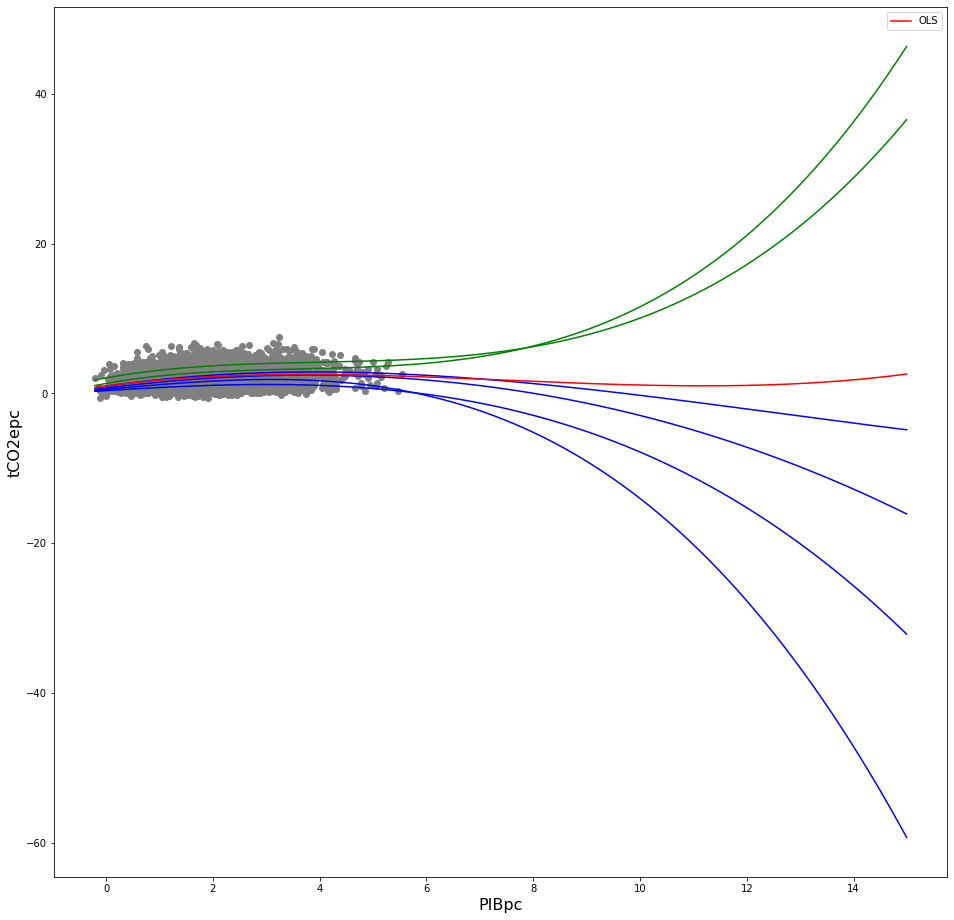

In [99]:
#Regressão Quantilica com o modelo cubico
x1 = np.arange(df.PIBpc.min(), 15, 0.01)
   
y6 =  0.3712 + 0.4576*(x1) -0.0327*(x1*x1) -0.0095*(x1*x1*x1)
y7 =  0.5381 + 0.6638*(x1) -0.0150*(x1*x1) -0.0197*(x1*x1*x1)
y8 =  0.7130 + 0.8925*(x1) -0.1088*(x1*x1) -0.0017*(x1*x1*x1)
y9 =  0.9538 + 1.0432*(x1) -0.1584*(x1*x1) + 0.0042*(x1*x1*x1)
y10 = 1.3274 + 1.2751*(x1) -0.3062*(x1*x1) + 0.0281*(x1*x1*x1)
y11 = 2.0739 + 1.2687*(x1) -0.2791*(x1*x1) + 0.0232*(x1*x1*x1)
    

#display(y2)
fig, ax = plt.subplots(figsize=(16, 16))


ax.plot(x1, y6, color="blue")
ax.plot(x1, y7, color="blue")
ax.plot(x1, y8, color="blue")
ax.plot(x1, y9, color="blue")
ax.plot(x1, y10, color="green")
ax.plot(x1, y11, color="green")



ax.plot(x1, ymod4, color="red", label="OLS")
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'grey')
legend = ax.legend()
ax.set_xlabel("PIBpc", fontsize=16)
ax.set_ylabel("tCO2epc", fontsize=16)